In [2]:
# E-commerce project using 
    # logistic K class without training
    # logistic K class with training
    # NN with training



import numpy as np
%run process.ipynb

In [3]:
# prediction WIHTOUT weight training

X,Y = get_data()

In [5]:
D = X.shape[1]
M = 5
K = len(set(Y)) # unique values in Y (classes)

# we are using random weights since we dont know how to train them yet
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [28]:
def softmax(a):
    expa = np.exp(a)
    Y = expa / expa.sum(axis=1, keepdims=True)
    return Y

In [29]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [30]:
def forward(X,W1,b1,W2,b2):
    Y = np.tanh(X.dot(W1) + b1)
    return softmax(Y.dot(W2) + b2)

In [31]:
P_Y_given_X = forward(X,W1,b1,W2,b2)
P = np.argmax(P_Y_given_X,axis=1)

In [32]:
def classification_rate(Y,P):
    return np.mean(Y==P)

In [33]:
print(f"classification rate: {classification_rate(Y,P)}")

classification rate: 0.048


In [52]:
# now we will train weights using gradient descent 
# this is not NN. this is logistic regression with K classes
# lets call this logistic softmax train

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [53]:
def y2_indicator(Y,K):
    N = len(Y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,Y[i]] = 1
    
    return ind

In [70]:
X,Y = get_data()
X,Y = shuffle(X,Y)
Y = Y.astype(np.int32)
D = X.shape[1]
K = len(set(Y))

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2_indicator(Ytrain,K)

Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2_indicator(Ytest,K)

# initializing random weights
W = np.random.randn(D,K)
b = np.zeros(K)

print(Xtrain.shape, W.shape, b.shape)

(400, 8) (8, 4) (4,)


In [71]:
def forward_K(X,W,b):
    return softmax(X.dot(W)+b)

In [72]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X,axis=1)

In [73]:
def cross_entropy(T,pY):
    return -np.mean(T*np.log(pY))

In [80]:
def logistic_kclass_train(Xtrain,Xtest,Ytrain,Ytrain_ind,Ytest_ind,Ytest,W,b):
    train_costs = []
    test_costs = []
    learning_rate = 0.001

    for i in range(10000):
        pYtrain = forward_K(Xtrain,W,b)
        pYtest = forward_K(Xtest,W,b)

        ctrain = cross_entropy(Ytrain_ind,pYtrain)
        ctest = cross_entropy(Ytest_ind,pYtest)
        train_costs.append(ctrain)
        test_costs.append(ctest)

        W -= learning_rate*Xtrain.T.dot(pYtrain-Ytrain_ind)
        b -= learning_rate*(pYtrain-Ytrain_ind).sum(axis=0)

        if i%1000==0:
            print(i, ctrain, ctest)

    print(f"train classification rate: {classification_rate(Ytrain,predict(pYtrain))}")
    print(f"test classification rate: {classification_rate(Ytest,predict(pYtest))}")

    # legend1, = plt.plot(train_costs, label='train cost')
    # legend2, = plt.plot(test_costs, label='test cost')
    # plt.legend([legend1, legend2])
    # plt.show()


    # so we see that the accuracy is much better than when the weights
    # were not trained. But we still did a little worse than binary 
    # classification
    
logistic_kclass_train(Xtrain,Xtest,Ytrain,Ytrain_ind,Ytest_ind,Ytest,W,b)

0 0.0854557711112079 0.06695425490918257
1000 0.08544924052815527 0.06694028466342723
2000 0.08544367957682991 0.06692672042306874
3000 0.08543891518545323 0.06691354417465123
4000 0.0854348093175652 0.06690074474151672
5000 0.08543125110737426 0.06688831495066111
6000 0.08542815093353204 0.06687624978452486
7000 0.08542543591017755 0.06686454519330168
8000 0.08542304642593511 0.06685319735080669
9000 0.0854209334657913 0.06684220220765648
train classification rate: 0.9025
test classification rate: 0.9


In [76]:
# now we will train a Neural Network to make predictions for our 
# E-commerce project

M = 5 # number of hidden units

# we already have train and test sets

# initializing weights randomly
W1 = np.random.rand(D,M)
b1 = np.zeros(M)
W2 = np.random.rand(M,K)
b2 = np.zeros(K)

In [77]:
# we also have to return Y
def forward_nn(X,W1,b1,W2,b2):
    Y = np.tanh(X.dot(W1) + b1)
    return softmax(Y.dot(W2) + b2),Y

0 0.02484182356844605 0.07509124045364164
1000 0.02472697697743325 0.07646035977379734
2000 0.024616880504109484 0.0778580746972598
3000 0.024508551770181172 0.0793042981018471
4000 0.02439800087826988 0.08079689127759059
5000 0.024279548263767124 0.08231875030599946
6000 0.024143912841937332 0.08386208137790079
7000 0.023970381516570095 0.08543102436795642
8000 0.023775156440979276 0.08702011973515673
9000 0.023638413459328596 0.08855215174280494
train classification rate: 0.965
test classification rate: 0.91


TypeError: A single argument passed to legend() must be a list of labels, but found an Artist in there.

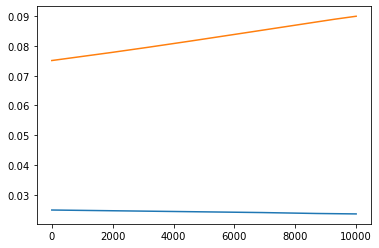

In [86]:
# main train loop

def NN_kclass_train(Xtrain,Xtest,Ytrain,Ytrain_ind,Ytest_ind,Ytest,W1,b1,W2,b2):
    train_costs = []
    test_costs = []
    learning_rate = 0.001
    
    for i in range(10000):
        pYtrain, Ztrain = forward_nn(Xtrain,W1,b1,W2,b2)
        pYtest, Ztest = forward_nn(Xtest,W1,b1,W2,b2)
        
        ctrain = cross_entropy(Ytrain_ind,pYtrain)
        ctest = cross_entropy(Ytest_ind,pYtest)
        train_costs.append(ctrain)
        test_costs.append(ctest)
        
        W2 -= learning_rate*Ztrain.T.dot(pYtrain-Ytrain_ind)
        b2 -= learning_rate*(pYtrain-Ytrain_ind).sum()
        dz = (pYtrain-Ytrain_ind).dot(W2.T)*(1-Ztrain*Ztrain)
        W1 -= learning_rate*(Xtrain.T.dot(dz))
        b1 -= learning_rate*dz.sum(axis=0)
        
        if i%1000==0:
            print(i, ctrain, ctest)
            
    print(f"train classification rate: {classification_rate(Ytrain,predict(pYtrain))}")
    print(f"test classification rate: {classification_rate(Ytest,predict(pYtest))}")
    
    legend1, = plt.plot(train_costs, label='train cost')
    legend2, = plt.plot(test_costs, label='test cost')
    plt.legend([legend1, legend2])
    plt.show()
    
NN_kclass_train(Xtrain,Xtest,Ytrain,Ytrain_ind,Ytest_ind,Ytest,W1,b1,W2,b2)